# Business Understanding
### Consumer finance company which specialises in lending various types of loans to urban customers. But likely there are 2 types risks associated which are as follows.
#### 1. Applicant likely to repay the loan but then not approving the loan for such
#### 2. Applicant NOT likely to repay the loan but then approving the loan for such

# Business Objective

### So the main objective is to find such Applicants who doesn't repay the loan (Defaulters)


In [1]:
#Suppress Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import scipy as sci

### 1. Data Import and Analysis

In [3]:
df=pd.read_csv("loan.csv")
df.shape

(39717, 111)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### 2. Data Cleaning

   #### 2.1 Finding out the percentage of Null values in all the columns

In [8]:
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)

total_il_high_credit_limit     100.0
mo_sin_old_rev_tl_op           100.0
bc_util                        100.0
bc_open_to_buy                 100.0
avg_cur_bal                    100.0
acc_open_past_24mths           100.0
inq_last_12m                   100.0
total_cu_tl                    100.0
inq_fi                         100.0
total_rev_hi_lim               100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
il_util                        100.0
total_bal_il                   100.0
mths_since_rcnt_il             100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
tot_cur_bal                    100.0
tot_coll_amt                   100.0
total_bc_limit                 100.0
dti_joint                      100.0
annual_inc_joint               100.0
mths_since_last_major_derog    100.0
m

#### 2.2 Dropping off the columns which have more than or equal to 6% NaN data

In [9]:
#### Now the number of columns have come down from 111 to 54
df = df.loc[:, df.isnull().mean() < .06]
df.shape

(39717, 52)

#### 2.3 Column Cleanings

In [10]:
### emp_length column treatment. 
### Making as 0 if its <1. if >10 making as 10. 
### NaaN values to fill with 0
### Making Data type as int from object

df.emp_length=df.emp_length.fillna('0')
df['emp_length']=df['emp_length'].map(lambda x:x.strip('year'))
df['emp_length']=df['emp_length'].map(lambda x:x.strip('years'))
df['emp_length']=df['emp_length'].map(lambda x:x.strip())
df['emp_length'] = df['emp_length'].str.replace(" ","")
df['emp_length']=df['emp_length'].map(lambda x: '0' if x=='<1' else x)
df['emp_length']=df['emp_length'].map(lambda x: '10' if x=='10+' else x)
df['emp_length']=df['emp_length'].astype(int)

In [11]:
### Treatment of int_rate column
### int_rate removing % and converting into float from object

df['int_rate'] = df['int_rate'].map(lambda x: x.rstrip('%'))
df['int_rate']=df['int_rate'].astype(np.float64)

In [12]:
### Treatment of revol_util column
### revol_util filling NaaN values to 0% and converting into float
df.revol_util=df.revol_util.fillna('0%')
df['revol_util'] = df['revol_util'].map(lambda x: x.rstrip('%'))
df['revol_util']=df['revol_util'].astype(np.float64)
df['revol_util'] = df['revol_util'].map(lambda x: x/100)

In [13]:
### Treatment of term column
### term field removal of months and making data type as int
### removing months in 36 months and makint int type

df['term'] = df['term'].map(lambda x: x.rstrip(' months'))
df['term']=df['term'].astype(int)

In [14]:
# Removing duplicate data if exits
df.drop_duplicates(subset = None, keep = 'first', inplace = True)
df.shape

(39717, 52)

### 3. Data Reduction

#### 3.1 Making new data frame with required columns for the analysis, Columns required are as follows
- #### member_id
- #### loan_amnt
- #### funded_amnt
- #### term 
- #### int_rate
- #### installement
- #### grade
- #### sub_grade
- #### emp_title
- #### emp_length
- #### home_ownership
- #### annual_inc

In [15]:
df = pd.DataFrame(df,columns=['member_id','loan_amnt','funded_amnt','term','int_rate','installment','emp_length','grade','sub_grade','annual_inc','revol_bal','revol_util','home_ownership','purpose','loan_status'])

In [16]:
df.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,grade,sub_grade,annual_inc,revol_bal,revol_util,home_ownership,purpose,loan_status
0,1296599,5000,5000,36,10.65,162.87,10,B,B2,24000.0,13648,0.837,RENT,credit_card,Fully Paid
1,1314167,2500,2500,60,15.27,59.83,0,C,C4,30000.0,1687,0.094,RENT,car,Charged Off
2,1313524,2400,2400,36,15.96,84.33,10,C,C5,12252.0,2956,0.985,RENT,small_business,Fully Paid
3,1277178,10000,10000,36,13.49,339.31,10,C,C1,49200.0,5598,0.210,RENT,other,Fully Paid
4,1311748,3000,3000,60,12.69,67.79,1,B,B5,80000.0,27783,0.539,RENT,other,Current


In [17]:
df.dtypes

member_id           int64
loan_amnt           int64
funded_amnt         int64
term                int32
int_rate          float64
installment       float64
emp_length          int32
grade              object
sub_grade          object
annual_inc        float64
revol_bal           int64
revol_util        float64
home_ownership     object
purpose            object
loan_status        object
dtype: object

### So target variables to do descriptive statistics are 
- #### Mainly Loan Status
- #### Loan Amount
- #### Loan Purpose
- #### Interest
- #### Grade
- #### term
- ####  emp_length
### Grades with the Interest rate relation
### https://www.lendingclub.com/public/rates-and-fees.action

### 4. Data Visualization : To Check the normality of the dataset
- #### 4.1 Univariate Analysis on Loan_amnt

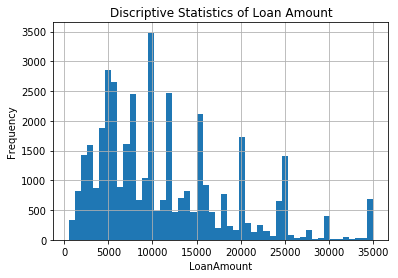

In [18]:
### Univariate Analysis for finding Outliers and removal on numerical variable loan_amnt
### Using histogram and boxplot

df['loan_amnt'].hist(bins=50)
plt.title("Discriptive Statistics of Loan Amount")
plt.xlabel("LoanAmount")
plt.ylabel("Frequency")
plt.show()

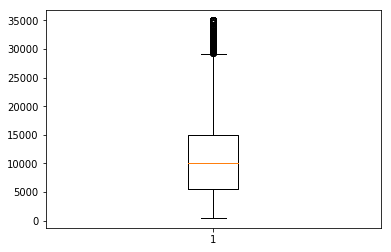

In [19]:
plt.boxplot(df['loan_amnt'])
plt.show()

#### 4.2 Univariate analysis on annual_inc 

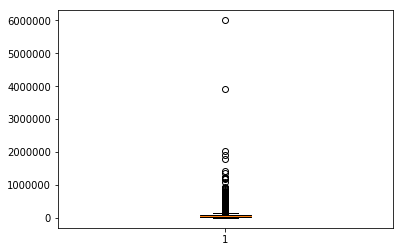

In [20]:
plt.boxplot(df['annual_inc'])
plt.show()

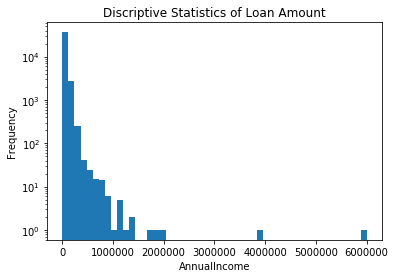

In [21]:
plt.hist(df.annual_inc,bins=50)
plt.title("Discriptive Statistics of Loan Amount")
plt.xlabel("AnnualIncome")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

In [22]:
df.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [23]:
df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [24]:
print(df.loan_amnt.median())
print(df.annual_inc.median())

10000.0
59000.0


### 4.3 First method to remove outliers
#### As per the above graphs data is not in normal distribution
#### And to achieve normal distribution, removal of outliers is followed

In [25]:
### Removal of less than 5% and Greater than 95% data and checking for normal distribution
P = np.percentile(df.loan_amnt, [5, 95])
nd_df = df[(df.loan_amnt > P[0]) & (df.loan_amnt < P[1])]
P = np.percentile(nd_df.annual_inc, [5, 95])
finalND_df = nd_df[(nd_df.annual_inc > P[0]) & (nd_df.annual_inc < P[1])]

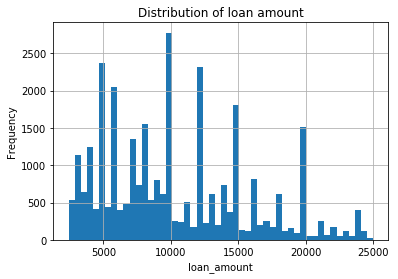

In [26]:
finalND_df['loan_amnt'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('loan_amount')
plt.title("Distribution of loan amount")
plt.show()

Text(0.5,1,'Distribution of annual income')

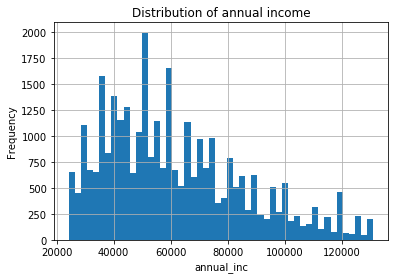

In [27]:
finalND_df['annual_inc'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('annual_inc')
plt.title("Distribution of annual income")

In [28]:
finalND_df.loan_amnt.describe()

count    31100.000000
mean     10390.762058
std       5377.717785
min       2425.000000
25%       6000.000000
50%      10000.000000
75%      14125.000000
max      24975.000000
Name: loan_amnt, dtype: float64

In [29]:
finalND_df.annual_inc.describe()

count     31100.000000
mean      61546.446716
std       24565.313943
min       24300.000000
25%       42000.000000
50%       57000.000000
75%       75832.540000
max      131040.000000
Name: annual_inc, dtype: float64

### 4.4 Second method to remove the outliers

#### keep only the ones that are within +3 to -3 standard deviations in the column 'loan_amnt'.
#### applying same on annual_inc

In [30]:
df11=df[np.abs(df.loan_amnt-df.loan_amnt.mean()) <= (3*df.loan_amnt.std())]
df12=df11[np.abs(df11.annual_inc-df11.annual_inc.mean()) <= (3*df11.annual_inc.std())]

Text(0.5,1,'Distribution of loan amount')

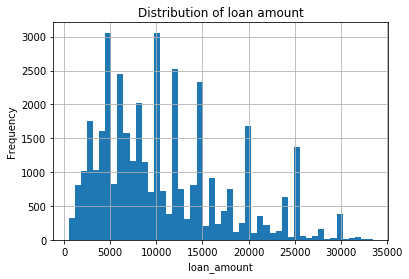

In [31]:
df12['loan_amnt'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('loan_amount')
plt.title("Distribution of loan amount")

Text(0.5,1,'Distribution of annual income')

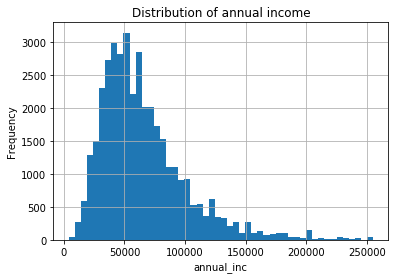

In [32]:
df12['annual_inc'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('annual_inc')
plt.title("Distribution of annual income")

In [33]:
df12.loan_amnt.describe()

count    38744.000000
mean     10741.796149
std       6757.325936
min        500.000000
25%       5225.000000
50%       9600.000000
75%      15000.000000
max      33500.000000
Name: loan_amnt, dtype: float64

In [34]:
df12.annual_inc.describe()

count     38744.000000
mean      65125.486126
std       35568.592191
min        4000.000000
25%       40000.000000
50%       57600.000000
75%       80000.000000
max      255000.000000
Name: annual_inc, dtype: float64

### Among above two methods, the second method is better normalization
### so considering second option data

In [35]:
df=df12
df_cpy=df.copy()

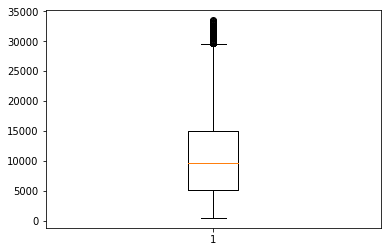

In [36]:
plt.boxplot(df['loan_amnt'])
plt.show()

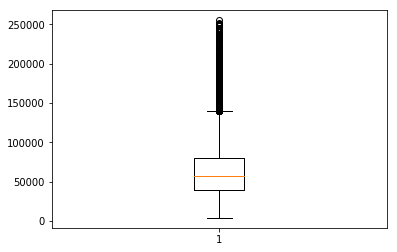

In [37]:
plt.boxplot(df['annual_inc'])
plt.show()

### Checking the Skewness and Kurtosis 
### skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. 
### If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
### For loan_amnt and annual_inc is data is ok

### Checking Kurtosis
### Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
### Out analysis Kurtosis value is Positive, so its ok

C:\Users\nyamathshaik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 0.840810
Kurtosis: 0.046600


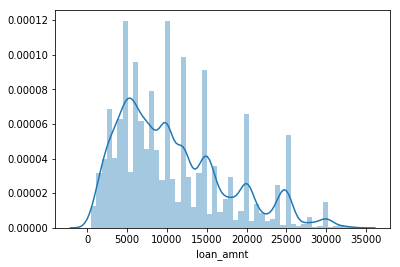

In [38]:
sns.distplot(df['loan_amnt']);
print("Skewness: %f" % df['loan_amnt'].skew())
print("Kurtosis: %f" % df['loan_amnt'].kurt())
plt.show()

C:\Users\nyamathshaik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 1.522588
Kurtosis: 3.336425


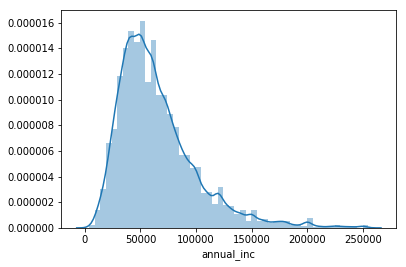

In [39]:
sns.distplot(df['annual_inc']);
print("Skewness: %f" % df['annual_inc'].skew())
print("Kurtosis: %f" % df['annual_inc'].kurt())
plt.show()

### 4.5 Univariate analysis on Loan status

#### 4.5.1 Descriptive statistics of loan_status. Univariant analysis on un-ordered variable loan_stauts

Text(0.5,1,'bar plot')

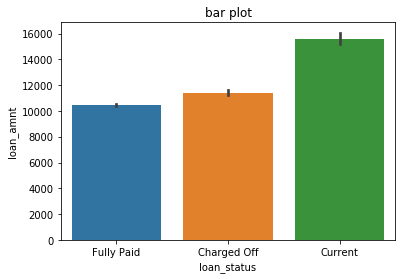

In [40]:
sns.barplot(df['loan_status'],df['loan_amnt'])
plt.title('bar plot')

In [41]:
term_df1 = df.loan_status.value_counts()
print(term_df1)
pcts = term_df1 / term_df1.sum()
pcts1=pcts.sort_values(ascending = True)
print(pcts1)

Fully Paid     32248
Charged Off     5446
Current         1050
Name: loan_status, dtype: int64
Current        0.027101
Charged Off    0.140564
Fully Paid     0.832335
Name: loan_status, dtype: float64


# Findings 1

### 14% People are Rejected the Loan amount
### 83.2% people are paid the loan
### 2.7% people are paying the loan

Text(0.5,1,'count plot')

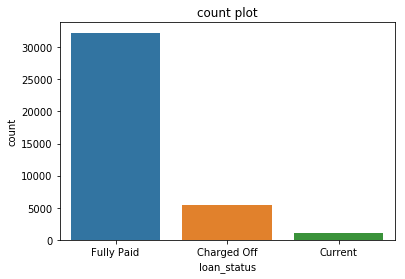

In [42]:
sns.countplot(df['loan_status'])
plt.title('count plot')

Text(0.5,1,'count plot')

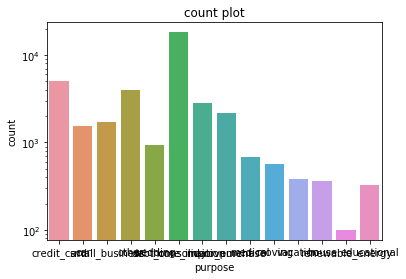

In [43]:
# Descriptive statistics of loan purpose. Univariant analysis on unorderd variable 'purpose'
sns.countplot(df['purpose'])
plt.yscale('log')
plt.title('count plot')

In [44]:
purpose_grp_by = df.groupby(df.purpose)
purpose_grp_by1 = pd.DataFrame(purpose_grp_by['loan_amnt'].sum()).sort_values(by = 'loan_amnt', ascending = False)
purpose_grp_by1

,loan_amnt
purpose,
debt_consolidation,220928825
credit_card,57277300
other,30707400
home_improvement,30308600
small_business,21765375
major_purchase,17102225
car,10462375
wedding,8959800
medical,5462850


# Findings 2
### 1. First maximum loan amount requested is to pay for debt_consolidation purpose
### 2. Second maximum loan amount requested is to pay credit_card
### 3. Third is others and 4th is home_improvement

### 4.6 Bivariant Analysis on int_rate and grade
#### 4.6.1 Two variables relations

In [46]:
# Interest rate Vs Grade

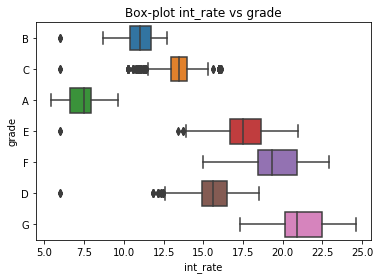

In [45]:
sns.boxplot(x="int_rate", y="grade", data=df)
plt.title("Box-plot int_rate vs grade")
plt.show()

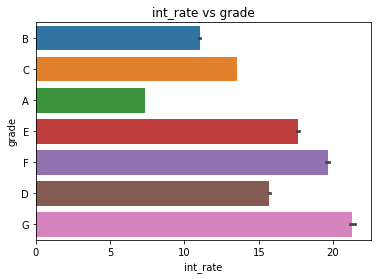

In [47]:
sns.barplot(df['int_rate'],df['grade'])
plt.title('int_rate vs grade')
plt.show()

# Findings 3

### Conclusion over grade vs intereste rate is as less int_rate grade is lower like near to A
### As int_rate is higher grade is higher near G
### Higher the grade the hight was the interest rate


### Loan term of 60 month is around 3 times risk as 36 months loan term

In [48]:
df.describe()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,revol_bal,revol_util
count,3.874400e+04,38744.000000,38744.000000,38744.000000,38744.000000,38744.000000,38744.000000,38744.000000,38744.000000,38744.000000
mean,8.465000e+05,10741.796149,10503.390202,42.197605,11.942739,312.908839,4.803247,65125.486126,12987.702328,0.487253
std,2.656824e+05,6757.325936,6541.538113,10.504050,3.680457,193.238402,3.597231,35568.592191,15278.021896,0.283499
min,7.069900e+04,500.000000,500.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,0.000000
25%,6.634895e+05,5225.000000,5100.000000,36.000000,8.940000,165.070000,2.000000,40000.000000,3647.000000,0.253000
50%,8.444615e+05,9600.000000,9500.000000,36.000000,11.830000,275.620000,4.000000,57600.000000,8697.000000,0.491000
75%,1.042808e+06,15000.000000,14800.000000,60.000000,14.420000,413.702500,9.000000,80000.000000,16644.000000,0.723000
max,1.314167e+06,33500.000000,33500.000000,60.000000,24.590000,1231.450000,10.000000,255000.000000,149588.000000,0.999000


### 4.7 Segment Variate Analysis
#### 4.7.1 Conducting univariate analysis on segments on data

In [49]:
### To check the reason for Charged Off . Making charged off datasheet
### Helps to extract the Insights to Rejecting a chances of loan 
df_chargedoff=df[df.loan_status=='Charged Off']

In [50]:
df_chargedoff.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,grade,sub_grade,annual_inc,revol_bal,revol_util,home_ownership,purpose,loan_status
1,1314167,2500,2500,60,15.27,59.83,0,C,C4,30000.0,1687,0.094,RENT,car,Charged Off
8,1306957,5600,5600,60,21.28,152.39,4,F,F2,40000.0,5210,0.326,OWN,small_business,Charged Off
9,1306721,5375,5375,60,12.69,121.45,0,B,B5,15000.0,9279,0.365,RENT,other,Charged Off
12,1298717,9000,9000,36,13.49,305.38,0,C,C1,30000.0,10452,0.917,RENT,debt_consolidation,Charged Off
14,1303503,10000,10000,36,10.65,325.74,3,B,B2,100000.0,11997,0.555,RENT,other,Charged Off


In [52]:
df_chargedoff.shape

(5446, 15)

In [53]:
purpose_grp_by = df.groupby(df.home_ownership)
purpose_grp_by1 = pd.DataFrame(purpose_grp_by['loan_amnt','purpose'].sum()).sort_values(by = 'home_ownership', ascending = False)
purpose_grp_by1

,loan_amnt
home_ownership,
RENT,182393375
OWN,29711025
OTHER,1019975
NONE,16800
MORTGAGE,203038975


In [54]:
namesgrouped = df.groupby(["home_ownership", "grade"]).sum()
namesgrouped

member_id  loan_amnt  funded_amnt    term  int_rate  \
home_ownership grade                                                         
MORTGAGE       A      4440425627   45868875     44511275  190728  36906.75   
               B      4355384420   62127825     60456200  219384  55851.05   
               C      2630191313   38924900     38010750  141672  42662.87   
               D      1654078970   26418025     25947325   92484  30826.57   
               E       979790434   18591400     18016225   59724  19717.49   
               F       399150026    8440075      8161775   24576   8693.73   
               G       114346372    2667875      2619425    7356   2817.42   
NONE           A          214993      10000        10000      36      7.75   
               B          242947       6800         6800      72     18.34   
OTHER          A         9963751     168475       162050     864    208.71   
               B        14227901     368450       363375    1152    363.06   
               C         6610653     174000       157850     576    203.98   
               D         7309959     169950       165425     600    242.19   
               E         2853920      89100        88875     252    112.40   
               F          815112      50000        32000      72     34.93   
OWN            A       737192062    6807300      6645525   31788   6277.97   
               B       766486495    9554350      9352075   37812  10076.18   
               C       473279096    5596050      5510275   25092   8033.49   
               D       309792705    4037450      3989975   16356   5846.02   
               E       167924921    2480850      2426875    9936   3319.72   
               F        54824991     845350       823375    3396   1196.19   
               G        18400570     389675       377975    1164    449.07   
RENT           A      3460522629   32002175     31292350  146928  29887.08   
               B      4901119913   55278500     54357925  228348  63715.13   
               C      3328393678   39233825     38658525  171468  56374.17   
               D      2320337537   29994475     29624700  124068  44081.55   
               E      1137580764   17147550     16653925   67980  23347.62   
               F       393093344    6538825      6352350   23976   8717.64   
               G       112242575    2198025      2168150    7044   2720.41   

                      installment  emp_length    annual_inc  revol_bal  \
home_ownership grade                                                     
MORTGAGE       A       1350541.42       29307  3.782824e+08   72283931   
               B       1744579.63       29245  3.910324e+08   87134661   
               C       1093127.85       18028  2.438175e+08   55344532   
               D        765117.93       11421  1.531147e+08   34544312   
               E        501687.05        6583  9.383126e+07   21837096   
               F        229176.03        2659  4.017297e+07    8826669   
               G         76337.75         791  1.280065e+07    3163719   
NONE           A           312.22           5  2.220000e+04       4767   
               B           217.06           0  2.200000e+05      16310   
OTHER          A          5150.16          92  1.667156e+06     191095   
               B         11976.27         135  2.102763e+06     398636   
               C          5301.39          85  9.140170e+05     155296   
               D          5625.61          48  1.153520e+06     312023   
               E          3128.05          16  3.688960e+05      82899   
               F          1152.18           7  1.820000e+05       3385   
OWN            A        203322.75        4286  4.540242e+07    8439033   
               B        277300.69        4519  5.280043e+07   10275777   
               C        166084.73        2703  3.176102e+07    6574013   
               D        122468.65        1693  2.131106e+07    4397671   
               E         68106.50         940  1.1

In [55]:
grp_home_owership_loan = df.groupby(['home_ownership','loan_status']).mean()

In [56]:
grp_home_owership_loan

member_id     loan_amnt   funded_amnt  \
home_ownership loan_status                                             
MORTGAGE       Charged Off  8.617048e+05  13082.910819  12630.794477   
               Current      1.121404e+06  16875.479930  16416.928447   
               Fully Paid   8.477689e+05  11592.949531  11307.157962   
NONE           Fully Paid   1.526467e+05   5600.000000   5600.000000   
OTHER          Charged Off  4.376609e+05  13747.222222  13326.388889   
               Fully Paid   4.291570e+05   9778.797468   9236.708861   
OWN            Charged Off  8.669998e+05  10554.108796  10346.817130   
               Current      1.105654e+06  13741.250000  13571.875000   
               Fully Paid   8.292790e+05   9659.578313   9466.064257   
RENT           Charged Off  8.640027e+05  10238.509150  10021.788662   
               Current      1.135123e+06  14172.418136  13904.471033   
               Fully Paid   8.260489e+05   9570.159468   9403.907612   

                                 term   int_rate  installment  emp_length  \
home_ownership loan_status                                                  
MORTGAGE       Charged Off  47.320960  13.615921   356.517012    5.744228   
               Current      60.000000  14.462356   389.214555    6.380454   
               Fully Paid   42.081624  11.215294   334.813677    5.758018   
NONE           Fully Paid   36.000000   8.696667   176.426667    1.666667   
OTHER          Charged Off  37.333333  13.185556   444.305556    4.388889   
               Fully Paid   36.000000  11.745949   308.052658    3.848101   
OWN            Charged Off  46.222222  13.619468   295.669676    4.615741   
               Current      60.000000  14.662500   322.492000    5.012500   
               Fully Paid   40.472289  11.302020   288.342076    4.881928   
RENT           Charged Off  44.800861  13.801407   294.201873    4.133477   
               Current      60.000000  15.626499   336.841738    5.015113   
               Fully Paid   40.101491  11.890720   290.834931    3.848731   

                              annual_inc     revol_bal  revol_util  
home_ownership loan_status                                          
MORTGAGE       Charged Off  70690.996858  17324.984608    0.551328  
               Current      79240.147888  18178.104712    0.511267  
               Fully Paid   78345.727916  16525.549799    0.450045  
NONE           Fully Paid   80733.333333   7025.666667    0.128333  
OTHER          Charged Off  63433.055556  14667.500000    0.439056  
               Fully Paid   66412.113924  11130.620253    0.425797  
OWN            Charged Off  50413.856528  11175.155093    0.519900  
               Current      56356.703000  12324.775000    0.450314  
               Fully Paid   56783.067791  10996.073494    0.419915  
RENT           Charged Off  51251.350477  10068.052745    0.560540  
               Current      60050.110680  12156.584383    0.572665  
               Fully Paid   56116.266702   9866.131384    0.506474

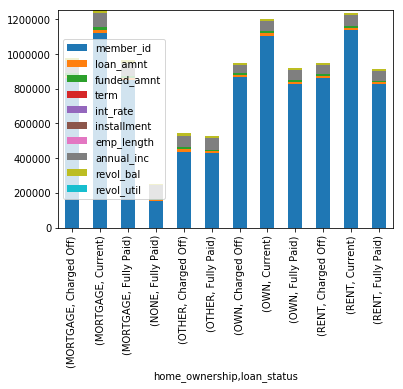

In [57]:
grp_home_owership_loan.plot.bar(stacked=True)

### 4.8 Bivariate Analysis on Loan amount and Term

C:\Users\nyamathshaik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nyamathshaik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


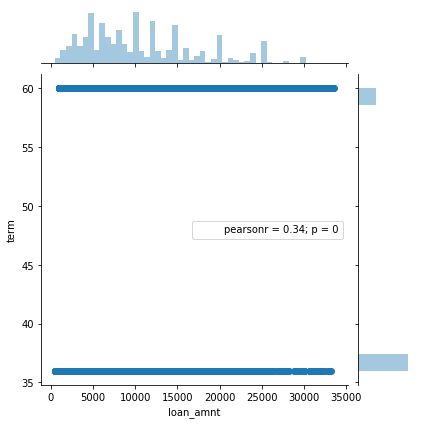

In [58]:
#### To study over the realtion ship between two variables
#### Basically on continous variables and
#### Categorical variables
### Scatter plots to analyze these analysis

sns.jointplot('loan_amnt', 'term', df)
plt.show()

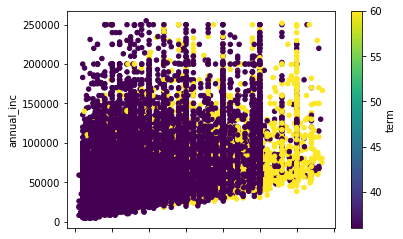

In [59]:
df.plot.scatter(x='loan_amnt', y='annual_inc', c='term',colormap='viridis')

### Extracting the correlation between different variables

### Correlation is a statistical measure that indicates the extent to which two or more variables
fluctuate together. A positive correlation indicates the extent to which those variables increase or 
decrease in parallel; a negative correlation indicates the extent to which one variable increases as t
he other decreases.

In [60]:
curr = df[["loan_amnt", "installment", "annual_inc", 'term', "grade", "int_rate", "loan_status", "purpose"]]
curr.head()

,loan_amnt,installment,annual_inc,term,grade,int_rate,loan_status,purpose
0,5000,162.87,24000.0,36,B,10.65,Fully Paid,credit_card
1,2500,59.83,30000.0,60,C,15.27,Charged Off,car
2,2400,84.33,12252.0,36,C,15.96,Fully Paid,small_business
3,10000,339.31,49200.0,36,C,13.49,Fully Paid,other
4,3000,67.79,80000.0,60,B,12.69,Current,other


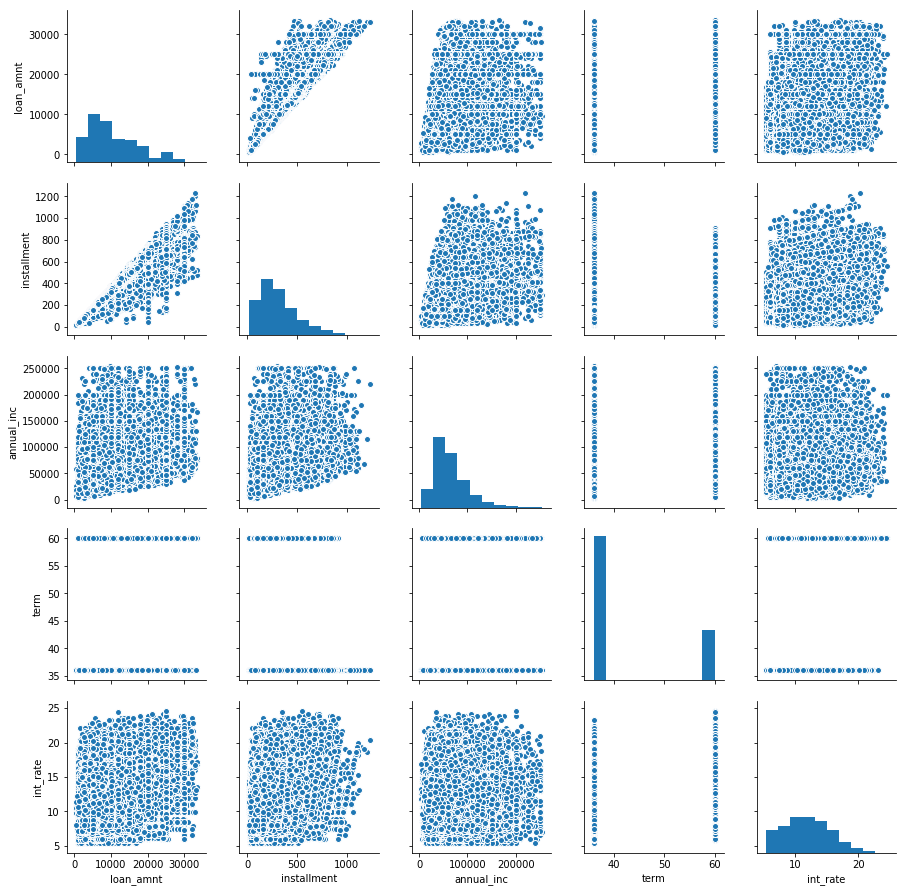

In [61]:
sns.pairplot(curr)
plt.show()

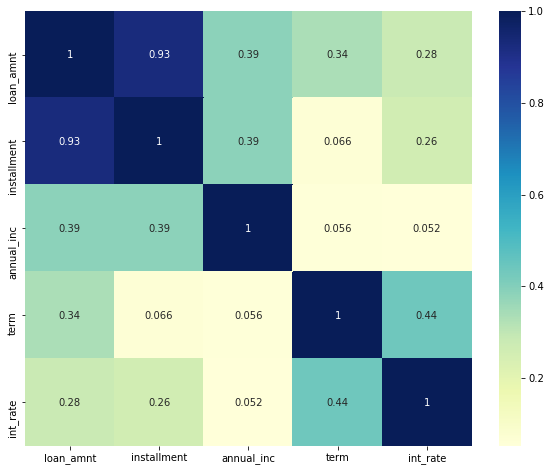

In [62]:
# figure size
plt.figure(figsize=(10,8))
cor = curr.corr()
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### 4. 9 Metric derivation
#### After doing the Univariate analysis, Segment Univariate, Bivariate analysis, we needs to do Derived Metrics
#### To find the Possibility to extract new data(column, information from the data set which helps in the predictions, to see if any new derive metrics like type-driven, business-driven,data-driven can be achieved

In [63]:
df['Total_Credit'] = round(df['revol_bal']/df['revol_util'])

In [64]:
df.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,grade,sub_grade,annual_inc,revol_bal,revol_util,home_ownership,purpose,loan_status,Total_Credit
0,1296599,5000,5000,36,10.65,162.87,10,B,B2,24000.0,13648,0.837,RENT,credit_card,Fully Paid,16306.0
1,1314167,2500,2500,60,15.27,59.83,0,C,C4,30000.0,1687,0.094,RENT,car,Charged Off,17947.0
2,1313524,2400,2400,36,15.96,84.33,10,C,C5,12252.0,2956,0.985,RENT,small_business,Fully Paid,3001.0
3,1277178,10000,10000,36,13.49,339.31,10,C,C1,49200.0,5598,0.210,RENT,other,Fully Paid,26657.0
4,1311748,3000,3000,60,12.69,67.79,1,B,B5,80000.0,27783,0.539,RENT,other,Current,51545.0


In [65]:
### Prediction loan approval status in future
### Loan_Approval
df['Required_Credit']=df['revol_bal']+df['installment']
df.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,grade,sub_grade,annual_inc,revol_bal,revol_util,home_ownership,purpose,loan_status,Total_Credit,Required_Credit
0,1296599,5000,5000,36,10.65,162.87,10,B,B2,24000.0,13648,0.837,RENT,credit_card,Fully Paid,16306.0,13810.87
1,1314167,2500,2500,60,15.27,59.83,0,C,C4,30000.0,1687,0.094,RENT,car,Charged Off,17947.0,1746.83
2,1313524,2400,2400,36,15.96,84.33,10,C,C5,12252.0,2956,0.985,RENT,small_business,Fully Paid,3001.0,3040.33
3,1277178,10000,10000,36,13.49,339.31,10,C,C1,49200.0,5598,0.210,RENT,other,Fully Paid,26657.0,5937.31
4,1311748,3000,3000,60,12.69,67.79,1,B,B5,80000.0,27783,0.539,RENT,other,Current,51545.0,27850.79


In [66]:
### To decide loan approval or not
### Require_credit should be < Total_Credit then only Loan has to be Accepted
df['Loan_Status_Prediction'] = df[['Required_Credit','Total_Credit']].apply(lambda x: 'ACCEPT' if x['Required_Credit'] < x['Total_Credit'] else 'REJECT', axis=1)

In [67]:
df.head(20)

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,grade,sub_grade,annual_inc,revol_bal,revol_util,home_ownership,purpose,loan_status,Total_Credit,Required_Credit,Loan_Status_Prediction
0,1296599,5000,5000,36,10.65,162.87,10,B,B2,24000.00,13648,0.8370,RENT,credit_card,Fully Paid,16306.0,13810.87,ACCEPT
1,1314167,2500,2500,60,15.27,59.83,0,C,C4,30000.00,1687,0.0940,RENT,car,Charged Off,17947.0,1746.83,ACCEPT
2,1313524,2400,2400,36,15.96,84.33,10,C,C5,12252.00,2956,0.9850,RENT,small_business,Fully Paid,3001.0,3040.33,REJECT
3,1277178,10000,10000,36,13.49,339.31,10,C,C1,49200.00,5598,0.2100,RENT,other,Fully Paid,26657.0,5937.31,ACCEPT
4,1311748,3000,3000,60,12.69,67.79,1,B,B5,80000.00,27783,0.5390,RENT,other,Current,51545.0,27850.79,ACCEPT
5,1311441,5000,5000,36,7.90,156.46,3,A,A4,36000.00,7963,0.2830,RENT,wedding,Fully Paid,28138.0,8119.46,ACCEPT
6,1304742,7000,7000,60,15.96,170.08,8,C,C5,47004.00,17726,0.8560,RENT,debt_consolidation,Fully Paid,20708.0,17896.08,ACCEPT
7,1288686,3000,3000,36,18.64,109.43,9,E,E1,48000.00,8221,0.8750,RENT,car,Fully Paid,9395.0,8330.43,ACCEPT
8,1306957,5600,5600,60,21.28,152.39,4,F,F2,40000.00,5210,0.3260,OWN,small_business,Charged Off,15982.0,5362.39,ACCEPT
9,1306721,5375,5375,60,12.69,121.45,0,B,B5,15000.00,9279,0.3650,RENT,other,Charged Off,25422.0,9400.45,ACCEPT


Text(0.5,1,'bar plot')

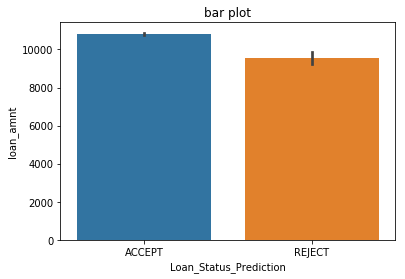

In [68]:
sns.barplot(df['Loan_Status_Prediction'],df['loan_amnt'])
plt.title('bar plot')

Text(0.5,1,'bar plot')

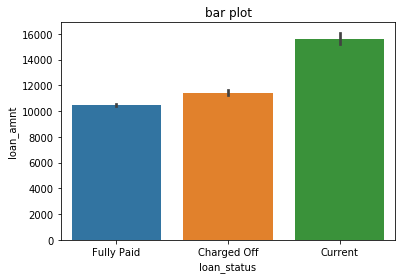

In [69]:
sns.barplot(df['loan_status'],df['loan_amnt'])
plt.title('bar plot')

In [70]:
df.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,grade,sub_grade,annual_inc,revol_bal,revol_util,home_ownership,purpose,loan_status,Total_Credit,Required_Credit,Loan_Status_Prediction
0,1296599,5000,5000,36,10.65,162.87,10,B,B2,24000.0,13648,0.837,RENT,credit_card,Fully Paid,16306.0,13810.87,ACCEPT
1,1314167,2500,2500,60,15.27,59.83,0,C,C4,30000.0,1687,0.094,RENT,car,Charged Off,17947.0,1746.83,ACCEPT
2,1313524,2400,2400,36,15.96,84.33,10,C,C5,12252.0,2956,0.985,RENT,small_business,Fully Paid,3001.0,3040.33,REJECT
3,1277178,10000,10000,36,13.49,339.31,10,C,C1,49200.0,5598,0.210,RENT,other,Fully Paid,26657.0,5937.31,ACCEPT
4,1311748,3000,3000,60,12.69,67.79,1,B,B5,80000.0,27783,0.539,RENT,other,Current,51545.0,27850.79,ACCEPT


### 5. Hypothesis testing
#### 5.1 Finding Critical value range of loan amount requested

In [71]:
# Critical Value Method
# finding critical values
import math
population_mean=df.loan_amnt.mean()
print("mean=",population_mean)
population_std_deviation=df.loan_amnt.std()
print("standard_deviation=",population_std_deviation)
numer_samples=df.shape[0]
print("number_samples=",numer_samples)
Standard_Error=(population_std_deviation/math.sqrt(numer_samples))
print("SE=",Standard_Error)

mean= 10741.796149081149
standard_deviation= 6757.325936240309
number_samples= 38744
SE= 34.32990798558645


In [72]:
#95% Confidence level 
Zc=1.645
UCV=population_mean+(Zc*Standard_Error)
LCV=population_mean-(Zc*Standard_Error)
print("Estimated Range in which population mean is:")
print("UCV=",UCV)
print("LCV=",LCV)

Estimated Range in which population mean is:
UCV= 10798.268847717438
LCV= 10685.32345044486


In [73]:
# t-test : testing the value of a population mean
#
mean_value=df.loan_amnt.mean()
stats.ttest_1samp(df.loan_amnt,round(df.loan_amnt.mean(),3))

Ttest_1sampResult(statistic=4.342602617169559e-06, pvalue=0.9999965351267762)

In [74]:
# sample t-test : testing for difference across populations
stats.ttest_ind(df.loan_amnt,df.annual_inc)

Ttest_indResult(statistic=-295.668439095428, pvalue=0.0)

In [75]:
# Paired tests : repeated mesurement on the same individuals
stats.ttest_rel(df.loan_amnt,df.annual_inc)

Ttest_relResult(statistic=-319.17714136289146, pvalue=0.0)

In [76]:
stats.zscore(df.loan_amnt)

array([-0.84972522, -1.21969883, -1.23449777, ..., -0.84972522,
       -0.84972522, -0.47975161])